In [2]:
# хранине данных
import pandas as pd
import numpy as np

import itertools

# Обучене модели и подготовка данных
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale, label_binarize
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')

In [3]:
best_col = ['TARGET', 'CREDIT', 'FACT_LIVING_TERM', 'FST_PAYMENT', 'AGE', 'PERSONAL_INCOME',
'WORK_TIME', 'LOAN_NUM_PAYM', 'TERM', 'EDUCATION', 'CHILD_TOTAL', 'DEPENDANTS',
'MARITAL_STATUS', 'FAMILY_INCOME', 'LOAN_NUM_CLOSED', 'FACT_PHONE_FL',
'LOAN_AVG_DLQ_AMT', 'GPF_DOCUMENT_FL', 'LOAN_MAX_DLQ_AMT', 'GENDER',
'FL_PRESENCE_FL', 'LOAN_NUM_TOTAL', 'HS_PRESENCE_FL', 'REG_FACT_POST_TP_FL',
'OWN_AUTO']
# , 'REG_FACT_POST_FL', 'LOAN_DLQ_NUM', 'AUTO_RUS_FL', 'REG_POST_FL',
# 'REG_FACT_FL', 'PREVIOUS_CARD_NUM_UTILIZED', 'LAND_PRESENCE_FL',
# 'REG_PHONE_FL', 'FACT_POST_FL', 'SOCSTATUS_PENS_FL', 'LOAN_MAX_DLQ',
# 'ORG_TP_FCAPITAL', 'SOCSTATUS_WORK_FL', 'GAR_PRESENCE_FL', 'GEN_PHONE_FL',
# 'COT_PRESENCE_FL'

In [4]:
data = pd.read_csv('credit.clean', sep='\t', index_col=None, header=0)
data.head()
data = data[best_col]

In [5]:
data.TARGET.value_counts()

0    13411
1     1812
Name: TARGET, dtype: int64

In [6]:
X = data.loc[:, data.columns.difference(['TARGET'])]
y = data['TARGET'].values

# for col in X.columns:
#     _mean = X[col].mean()
#     _std = X[col].std()
#     X[col] = (X[col] - _mean) / _std
    
X = X.values
X = scale(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
lr = LogisticRegression(random_state=140)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=140, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4408    6]
 [ 607    3]]


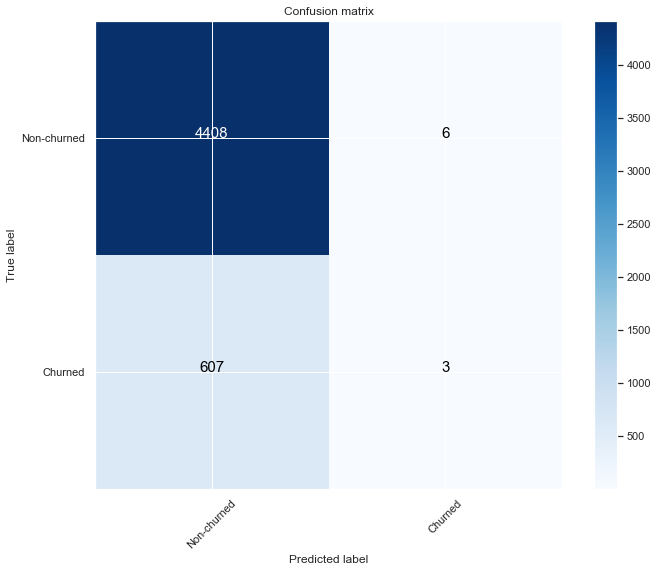

In [10]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, lr.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

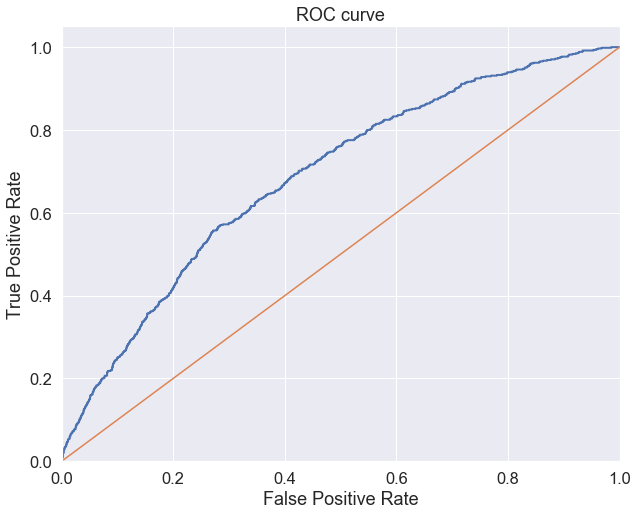

In [11]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [12]:
lr.predict_proba(X_test)

array([[0.7285526 , 0.2714474 ],
       [0.87351297, 0.12648703],
       [0.77391987, 0.22608013],
       ...,
       [0.96105684, 0.03894316],
       [0.89354899, 0.10645101],
       [0.85813869, 0.14186131]])

In [13]:
err_train = np.mean(y_train != lr.predict(X_train))
err_test  = np.mean(y_test  != lr.predict(X_test))
err_all  = np.mean(y  != lr.predict(X))
print (err_train, err_test, err_all)
# 0.11873713109128346 0.12201433121019108 0.1198186953951258

0.11824688694970095 0.12201433121019108 0.11949024502397687


In [14]:
lr.predict(X).mean()

0.001642251855744597

In [15]:
best_col = ['CREDIT', 'FACT_LIVING_TERM', 'FST_PAYMENT', 'AGE', 'PERSONAL_INCOME',
'WORK_TIME', 'LOAN_NUM_PAYM', 'TERM', 'EDUCATION', 'CHILD_TOTAL', 'DEPENDANTS',
'MARITAL_STATUS', 'FAMILY_INCOME', 'LOAN_NUM_CLOSED', 'FACT_PHONE_FL',
'LOAN_AVG_DLQ_AMT', 'GPF_DOCUMENT_FL', 'LOAN_MAX_DLQ_AMT', 'GENDER',
'FL_PRESENCE_FL', 'LOAN_NUM_TOTAL', 'HS_PRESENCE_FL', 'REG_FACT_POST_TP_FL',
'OWN_AUTO']

In [16]:
df = pd.read_csv('Credit_new.clean', sep='\t', index_col=None, header=0)
df.head()
df = df[best_col]


In [28]:
new = pd.read_csv('Credit_new.csv', sep=';', encoding='CP1251', decimal=',')
users = new['AGREEMENT_RK'].values

In [21]:
XX = df.values
XX = scale(XX)

In [35]:
lr.predict_proba(XX).mean()

0.5

In [37]:
result = pd.DataFrame({'AGREEMENT_RK':users, 'pred':lr.predict_proba(XX)[:, 1]})

In [38]:
print (result.head())

   AGREEMENT_RK      pred
0      75286343  0.119008
1      62806593  0.125344
2      66841260  0.442117
3      60086225  0.065658
4      74187778  0.075402


In [39]:
result.to_csv('result_LogReg.csv', index=None, header=None)